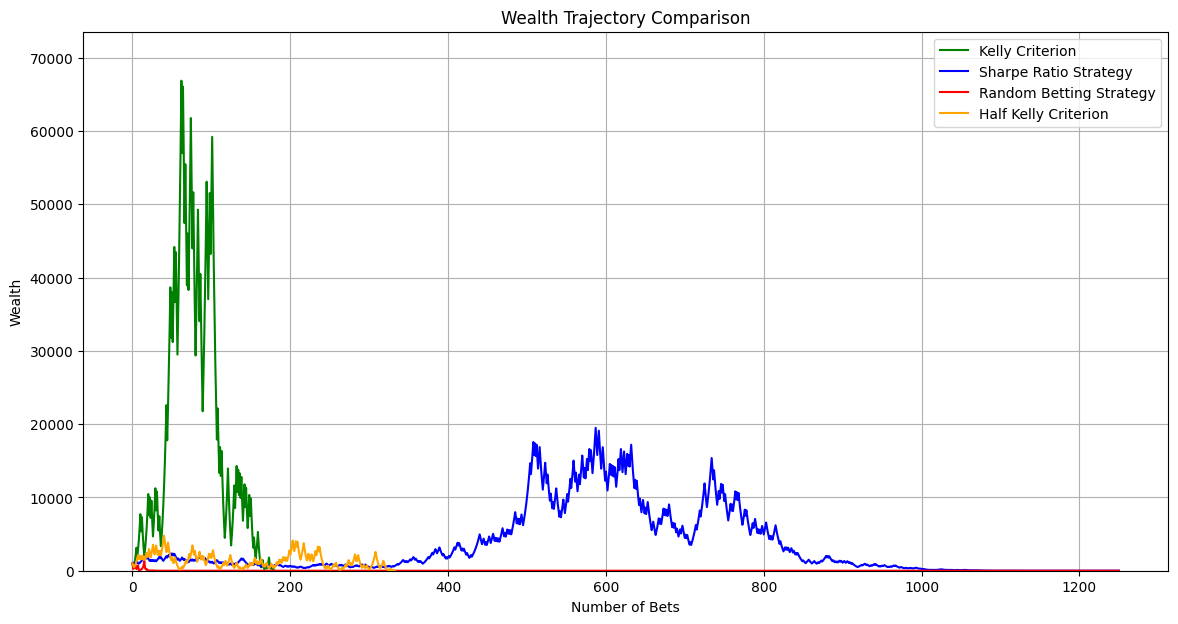

<Figure size 640x480 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(15)


def simulate_kelly_wealth(initial_wealth, num_bets):
    wealth = initial_wealth
    wealth_trajectory = [wealth]

    for _ in range(num_bets):
        # Calculate the optimal theta at the current wealth level (simplified assumption)
        u_cbrt = np.cbrt((13 - 72 * W) / (216 * wealth**5 - 540 * wealth**4 + 35 * wealth**3 + 10.392 * (
            wealth**6 * (2 * wealth + 3)**2 * (108 * wealth**2 - 1)
        ) ** 0.5))
        theta_star = (u_cbrt + np.cbrt(216 * wealth**5 - 540 *
                      wealth**4 + 35 * wealth**3) + 5 * wealth) / (wealth**2)
        # Ensure theta is within a realistic range
        theta_star = max(min(theta_star, 1), 0)

        # Calculate the bet outcome
        if np.random.rand() < 0.5:  # 50% chance of winning
            wealth += (np.sqrt(theta_star * wealth) + 1)**2
        else:  # 50% chance of losing
            wealth -= theta_star * wealth

        wealth_trajectory.append(wealth)

        # Break if wealth falls below zero (bankrupt)
        if wealth <= 0:
            break

    return wealth_trajectory


def simulate_half_kelly_wealth(initial_wealth, num_bets):
    wealth = initial_wealth
    wealth_trajectory = [wealth]

    for _ in range(num_bets):
        # Calculate the optimal theta at the current wealth level using the original formula
        u_cbrt = np.cbrt((13 - 72 * wealth) / (216 * wealth**5 - 540 * wealth**4 + 35 * wealth**3 + 10.392 * (
            wealth**6 * (2 * wealth + 3)**2 * (108 * wealth**2 - 1)
        ) ** 0.5))
        theta_star_full = (u_cbrt + np.cbrt(216 * wealth**5 - 540 * wealth**4 + 35 * wealth**3) + 5 * wealth) / (wealth**2)

        # Adjust theta to half-Kelly
        theta_star_half = theta_star_full / 2
        # Ensure theta is within a realistic range
        theta_star_half = max(min(theta_star_half, 1), 0)

        # Calculate the bet outcome
        if np.random.rand() < 0.5:  # 50% chance of winning
            wealth += (np.sqrt(theta_star_half * wealth) + 1)**2
        else:  # 50% chance of losing
            wealth -= theta_star_half * wealth

        wealth_trajectory.append(wealth)

        # Break if wealth falls below zero (bankrupt)
        if wealth <= 0:
            break

    return wealth_trajectory


def simulate_sharpe_wealth(initial_wealth, num_bets, n):
    wealth = initial_wealth
    wealth_trajectory = [wealth]
    for _ in range(num_bets):
        bet = n * wealth  # Betting a fraction based on some optimal 'n'
        if np.random.rand() < 0.5:  # 50% chance of winning
            wealth += bet
        else:  # 50% chance of losing
            wealth -= bet
        wealth_trajectory.append(wealth)
        if wealth <= 0:
            break
    return wealth_trajectory


def simulate_random_wealth(initial_wealth, num_bets):
    wealth = initial_wealth
    wealth_trajectory = [wealth]
    for _ in range(num_bets):
        bet = np.random.rand() * wealth  # Random fraction of current wealth
        if np.random.rand() < 0.5:  # 50% chance of winning
            wealth += bet
        else:  # 50% chance of losing
            wealth -= bet
        wealth_trajectory.append(wealth)
        if wealth <= 0:
            break
    return wealth_trajectory


# Parameters
W = 1000  # Initial wealth
num_bets = 1250

# Simulate wealth trajectories
wealth_trajectory_kelly = simulate_kelly_wealth(W, num_bets)
wealth_trajectory_sharpe = simulate_sharpe_wealth(
    W, num_bets, n=0.1)  # Assuming n is fixed at 0.1
wealth_trajectory_random = simulate_random_wealth(W, num_bets)
wealth_trajectory_half_kelly = simulate_half_kelly_wealth(W, num_bets)

# Plotting all wealth trajectories
plt.figure(figsize=(14, 7))
plt.plot(wealth_trajectory_kelly, label='Kelly Criterion', color='green')
plt.plot(wealth_trajectory_sharpe, label='Sharpe Ratio Strategy', color='blue')
plt.plot(wealth_trajectory_random, label='Random Betting Strategy', color='red')
plt.plot(wealth_trajectory_half_kelly, label='Half Kelly Criterion', color='orange')
plt.title('Wealth Trajectory Comparison')
plt.xlabel('Number of Bets')
plt.ylabel('Wealth')
# plt.xlim(0, len(wealth_trajectory_kelly))
plt.ylim(0, max(max(wealth_trajectory_kelly), max(
    wealth_trajectory_sharpe), max(wealth_trajectory_random)) * 1.1)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('gameA.png')

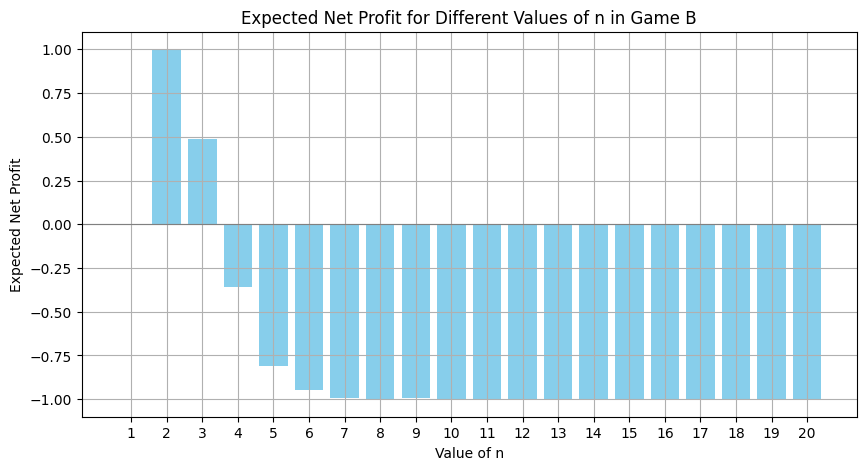

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_game_b(M, N, num_simulations=10000):
    results = np.zeros(N)  # Store expected profit for each n

    for n in range(1, N+1):
        profit = 0
        for _ in range(num_simulations):
            numbers = np.random.randint(1, M+1, n)
            sorted_indices = np.argsort(numbers)
            if np.all(sorted_indices == np.arange(n)):  # Check if the array is sorted
                profit += n**2 - 1  # Payout minus cost
            else:
                profit -= 1  # Only the cost
        
        results[n-1] = profit / num_simulations  # Average profit

    return results

# Parameters
M = 1000
N = 20

# Simulate the game
profits = simulate_game_b(M, N)

# Plotting results
plt.figure(figsize=(10, 5))
plt.bar(range(1, N+1), profits, color='skyblue')
plt.axhline(0, color='gray', linewidth=0.8)  # Line at zero for reference
plt.title('Expected Net Profit for Different Values of n in Game B')
plt.xlabel('Value of n')
plt.ylabel('Expected Net Profit')
plt.xticks(range(1, N+1))
plt.grid(True)
plt.show()

In [49]:
!pip install deuces

In [53]:
from deuces import Deck, Evaluator, Card
import numpy as np
import matplotlib.pyplot as plt

def simulate_game_c(strategy, num_simulations=1000):
    evaluator = Evaluator()
    wins = 0
    for _ in range(num_simulations):
        deck = Deck()
        player_cards = []
        opponent_cards = []
        
        # Draw initial card for the flush strategy
        first_card = deck.draw(1) if strategy == 'flush' else None
        first_suit = Card.get_suit_int(first_card) if strategy == 'flush' else None
        
        # Proceed with the game
        for i in range(15):
            card = deck.draw(1)
            
            if strategy == 'flush' and i == 0:
                player_cards.append(first_card)
            elif strategy == 'flush':
                if len(player_cards) < 5 and Card.get_suit_int(card) == first_suit:
                    player_cards.append(card)
                else:
                    opponent_cards.append(card)
            elif strategy == 'random':
                if np.random.rand() < 0.333 and len(player_cards) < 5:
                    player_cards.append(card)
                else:
                    opponent_cards.append(card)
                    
            if len(player_cards) == 5 and len(opponent_cards) == 10:
                break
        
        # Evaluate hands
        player_score = evaluator.evaluate([], player_cards)
        opponent_score = evaluator.evaluate([], opponent_cards)
        
        if player_score < opponent_score:
            wins += 1
        else:
            wins -= 1

    return wins / num_simulations

# Simulate strategies
flush_wins = simulate_game_c('flush')
random_wins = simulate_game_c('random')

# Plotting results
strategies = ['Flush Strategy', 'Random Strategy']
win_rates = [flush_wins, random_wins]

plt.figure(figsize=(8, 4))
plt.bar(strategies, win_rates, color=['blue', 'red'])
plt.xlabel('Strategy')
plt.ylabel('Win Rate')
plt.title('Win Rate Comparison of Different Strategies in Game C')
plt.ylim(-1, 1)  # Adjust for possible negative win rates
plt.axhline(0, color='gray', linestyle='--')
plt.show()


KeyError: 10

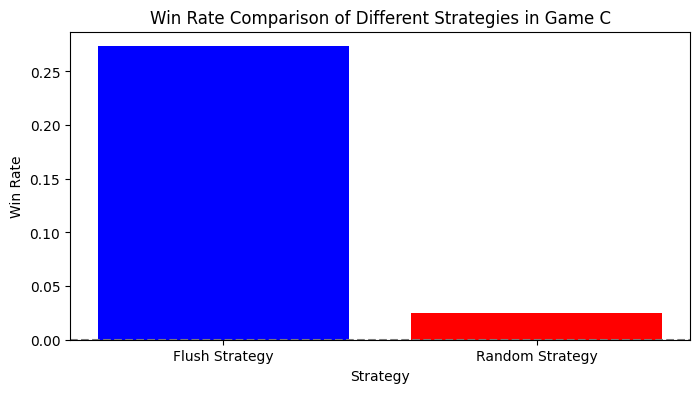

[0.2733, 0.0246]

In [66]:
from deuces import Deck, Evaluator, Card
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def best_hand_from_cards(cards, evaluator):
    # Generate all 5-card combinations from the 10 cards and evaluate them
    all_combinations = combinations(cards, 5)
    best_score = float('inf')
    for combo in all_combinations:
        score = evaluator.evaluate([], list(combo))
        if score < best_score:
            best_score = score
    return best_score

def simulate_game_c(strategy, num_simulations=10_000):
    evaluator = Evaluator()
    wins = 0
    for _ in range(num_simulations):
        deck = Deck()
        player_cards = []
        opponent_cards = []

        if strategy == 'flush':
            first_card = deck.draw(1)
            first_suit = Card.get_suit_int(first_card)
            player_cards.append(first_card)

        for i in range(14):  # 14 more draws to make total 15
            card = deck.draw(1)
            
            if strategy == 'flush':
                if len(player_cards) < 5 and Card.get_suit_int(card) == first_suit:
                    player_cards.append(card)
                else:
                    opponent_cards.append(card)
            elif strategy == 'random':
                if np.random.rand() < 0.333 and len(player_cards) < 5:
                    player_cards.append(card)
                else:
                    opponent_cards.append(card)

        # Fill remaining slots if not full yet
        while len(player_cards) < 5:
            player_cards.append(deck.draw(1))
        while len(opponent_cards) < 10:
            opponent_cards.append(deck.draw(1))

        # Evaluate hands only if both have correct number of cards
        if len(player_cards) == 5 and len(opponent_cards) == 10:
            player_score = evaluator.evaluate([], player_cards)
            opponent_score = best_hand_from_cards(opponent_cards, evaluator)

            if player_score < opponent_score:  # Lower scores are better
                wins += 1
            # else:
            #     wins -= 1

    return wins / num_simulations

# Simulate strategies
flush_wins = simulate_game_c('flush')
random_wins = simulate_game_c('random')

# Plotting results
strategies = ['Flush Strategy', 'Random Strategy']
win_rates = [flush_wins, random_wins]

plt.figure(figsize=(8, 4))
plt.bar(strategies, win_rates, color=['blue', 'red'])
plt.xlabel('Strategy')
plt.ylabel('Win Rate')
plt.title('Win Rate Comparison of Different Strategies in Game C')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

win_rates